In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from plotly.figure_factory import create_distplot

/home/kleyton/codenation/enem-2/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('train.csv', index_col='NU_INSCRICAO')
test_data = pd.read_csv('test.csv', index_col='NU_INSCRICAO')

Usando somente colunas presentes nos dados de teste:

In [4]:
train_cols = test_data.columns.to_list() + ['NU_NOTA_MT']

df = df[train_cols]
df.head()

CO_UF_RESIDENCIA SG_UF_RESIDENCIA  \
NU_INSCRICAO                                                                  
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                43               RS   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                23               CE   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                23               CE   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                33               RJ   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                13               AM   

                                          NU_IDADE TP_SEXO  TP_COR_RACA  \
NU_INSCRICAO                                                              
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad        24       M            1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723        17       F            3   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568        21       F            3   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe        25       F            0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268        28       M            2   

                                          TP_NACIONALIDADE  TP_ST_CONCLUSAO  \
NU_INSCRICAO                                                                  
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                 1                1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                 1                2   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                 1                3   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                 1                1   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                 1                1   

                                          TP_ANO_CONCLUIU  TP_ESCOLA  \
NU_INSCRICAO                                                           
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                4          1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                0          2   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                0          1   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                9          1   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                4          1   

                                          TP_ENSINO  ...  NU_NOTA_REDACAO  \
NU_INSCRICAO                                         ...                    
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad        NaN  ...            520.0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723        1.0  ...            580.0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568        NaN  ...              NaN   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe        NaN  ...              NaN   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268        NaN  ...              NaN   

                                          Q001  Q002  Q006  Q024  Q025  Q026  \
NU_INSCRICAO                                                                   
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad     D     D     C     A     A     C   
2c3acac4b33ec2b195d77e7c04a2d75727fad723     A     A     B     A     A     A   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568     D     D     C     A     A     A   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe     H     E     E     C     B     C   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268     E     D     C     A     A     B   

                                          Q027  Q047  NU_NOTA_MT  
NU_INSCRICAO                                                      
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad     H     A       399.4  
2c3acac4b33ec2b195d77e7c04a2d75727fad723   NaN     A       459.8  
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568   NaN     A         NaN  
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe     F     D         NaN  
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268     F     A         NaN  

[5 rows x 47 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               4282 non-null   float64
 10  IN_TREINEIRO            13730 non-null  int64  
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA           

In [6]:
cols_to_drop = [
    'CO_UF_RESIDENCIA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q027'
]
df = df.drop(columns=cols_to_drop)
df = df.fillna(value=0)

test_data = test_data.drop(columns=cols_to_drop).fillna(value=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SG_UF_RESIDENCIA   13730 non-null  object 
 1   NU_IDADE           13730 non-null  int64  
 2   TP_SEXO            13730 non-null  object 
 3   TP_COR_RACA        13730 non-null  int64  
 4   TP_NACIONALIDADE   13730 non-null  int64  
 5   TP_ST_CONCLUSAO    13730 non-null  int64  
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_ESCOLA          13730 non-null  int64  
 8   IN_TREINEIRO       13730 non-null  int64  
 9   IN_BAIXA_VISAO     13730 non-null  int64  
 10  IN_CEGUEIRA        13730 non-null  int64  
 11  IN_SURDEZ          13730 non-null  int64  
 12  IN_DISLEXIA        13730 non-null  int64  
 13  IN_DISCALCULIA     13730 non-null  int64  
 14  IN_SABATISTA       13730 non-null  int64  
 15  I

## Estudo do perfil socioeconômico
### Hipótese
Os alunos pertencem a diferentes perfis socioeconômicos, os quais influenciam na nota.

In [7]:
df.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

Exceto pelas questões Q025 e Q026, que se referem a acesso à internet na residência e o excercimento de atividade remunerada, onde só podemos classificar como variáveis categóricas, pode-se atribuir uma relação linear com as classificações.

Além dessas questões, também podemos aplicar One-Hot Encoding nas demais categorias.

In [8]:
cols_social_profile = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
    'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO',
    'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
    'IN_GESTANTE', 'IN_IDOSO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
    'Q026', 'Q047'    
]

df_social = df[cols_social_profile]
df = df.drop(columns=cols_social_profile)

label_cols = [
    'Q001', 'Q002', 'Q006',
    'Q024', 'Q047'
]
onehot_cols = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
    'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO',
    'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
    'IN_GESTANTE', 'IN_IDOSO', 'Q025', 'Q026'
]

df_social = pd.get_dummies(
    df_social,
    columns=onehot_cols,
    drop_first=True
)

test_social = test_data[cols_social_profile]
test_data = test_data.drop(columns=cols_social_profile)
test_social = pd.get_dummies(
    test_social,
    columns=onehot_cols,
    drop_first=True
)

# Caso os dados de teste tenham menos colunas que os dados de treino
df_social = df_social[test_social.columns]


lab_encoder = LabelEncoder()

for col in label_cols:
    lab_encoder.fit(df_social[col])
    df_social[col] = lab_encoder.transform(df_social[col])
    test_social[col] = lab_encoder.transform(test_social[col])
    
df_social.head()

Q001  Q002  Q006  Q024  Q047  \
NU_INSCRICAO                                                             
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad     3     3     2     0     0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723     0     0     1     0     0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568     3     3     2     0     0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe     7     4     4     2     3   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268     4     3     2     0     0   

                                          TP_SEXO_M  TP_COR_RACA_1  \
NU_INSCRICAO                                                         
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad          1              1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723          0              0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568          0              0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe          0              0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268          1              0   

                                          TP_COR_RACA_2  TP_COR_RACA_3  \
NU_INSCRICAO                                                             
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad              0              0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723              0              1   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568              0              1   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe              0              0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268              1              0   

                                          TP_COR_RACA_4  ...  TP_ESCOLA_2  \
NU_INSCRICAO                                             ...                
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad              0  ...            0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723              0  ...            1   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568              0  ...            0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe              0  ...            0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268              0  ...            0   

                                          TP_ESCOLA_3  IN_TREINEIRO_1  \
NU_INSCRICAO                                                            
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad            0               0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723            0               0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568            0               0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe            0               0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268            0               0   

                                          IN_BAIXA_VISAO_1  IN_SURDEZ_1  \
NU_INSCRICAO                                                              
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                 0            0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                 0            0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                 0            0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                 0            0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                 0            0   

                                          IN_SABATISTA_1  IN_GESTANTE_1  \
NU_INSCRICAO                                                              
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad               0              0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723               0              0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568               0              0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe               0              0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268               0              0   

                                          Q025_B  Q026_B  Q026_C  
NU_INSCRICAO                                                      
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad       0       0       1  
2c3acac4b33ec2b195d77e7c04a2d75727fad723       0       0       0  
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568       0       0       0  
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe       1       0       1  
bf896ac

Nas questões Q001 e Q002, o valor 7 (máximo) indica que o inscrito não sabe o nível de escolaridade do responsável.

Por isso, seria mais apropriado substituí-los por 0.

In [9]:
df_social.loc[df_social['Q001'] == 7, 'Q001'] = 0
df_social.loc[df_social['Q002'] == 7, 'Q002'] = 0
test_social.loc[test_social['Q001'] == 7, 'Q001'] = 0
test_social.loc[test_social['Q002'] == 7, 'Q002'] = 0

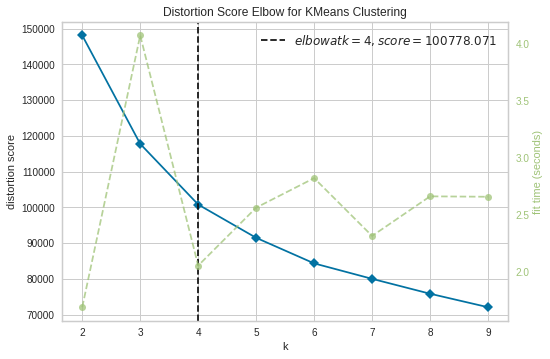

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10),
)

visualizer.fit(df_social)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [11]:
kmeans = KMeans(n_clusters=4)
df['PERFIL_SOCIOECON'] = kmeans.fit_predict(df_social)

In [12]:
pd.DataFrame(kmeans.cluster_centers_, columns=df_social.columns)

Q001      Q002       Q006      Q024      Q047  TP_SEXO_M  \
0  3.141665  3.638188   2.023843  0.618716  0.255315   0.388834   
1  3.272268  3.752066   6.157943  1.180441  1.063820   0.422406   
2  0.885791  1.386127   1.715821  0.410816  0.087672   0.352032   
3  4.640708  4.785841  12.469027  1.925664  2.391150   0.470796   

   TP_COR_RACA_1  TP_COR_RACA_2  TP_COR_RACA_3  TP_COR_RACA_4  ...  \
0       0.324459       0.138486       0.491158       0.025830  ...   
1       0.509642       0.089073       0.352158       0.021120  ...   
2       0.246221       0.146288       0.560128       0.020658  ...   
3       0.672566       0.056637       0.210619       0.023009  ...   

   TP_ESCOLA_2  TP_ESCOLA_3  IN_TREINEIRO_1  IN_BAIXA_VISAO_1   IN_SURDEZ_1  \
0     0.283131     0.021458        0.151997          0.000596  5.960660e-04   
1     0.217172     0.117080        0.125803          0.000918  1.680513e-18   
2     0.298959     0.008902        0.103628          0.001512  3.359086e-04   
3     0.061947     0.270796        0.224779          0.005310  8.673617e-19   

   IN_SABATISTA_1  IN_GESTANTE_1    Q025_B    Q026_B    Q026_C  
0        0.010530       0.000596  0.582555  0.266441  0.201868  
1        0.011019       0.000459  0.893480  0.187328  0.270891  
2        0.009070       0.001344  0.400739  0.284683  0.223211  
3        0.003540       0.001770  0.975221  0.115044  0.125664  

[4 rows x 28 columns]

Estes dados preliminares imploram por mais atenção. Podemos identificar alguns perfis muito claros ao traçar os perfis socioeconômicos.

Lembrando que as questões são:
Q001 e Q002: Grau de estudo do homem/mulher responsável. 4 indica conclusão do ensino médio. 5 de uma graduação.

Q006: Renda mensal da família. 2 indica a faixa de R\\$ 880 a R\\$ 1320. 5 indica de R\\$ 2200 até R\\$ 2640 e 12 indica de R\\$7920 até R\\$8800.

Q024: O número de computadores na residência.

Q047: Tipo de escola em que estudou.

Q025: Ter acesso à internet em casa.

Q026: Se nunca trabalhou, já trabalhou ou está trabalhando.

Sobre a cor/raça:

1: Branco

2: Preto

3: Pardo

In [13]:
pca = PCA(n_components=2)
clusters_plot = pca.fit_transform(df_social)

df_size = df['NU_NOTA_MT'].copy()
df_size.loc[df_size < 100] = 300

df_size = MinMaxScaler().fit_transform(df_size.values.reshape(-1,1))

edu_responsavel = np.maximum(df_social['Q001'].values, df_social['Q002'].values)


fig = px.scatter(
    x=clusters_plot[:, 0],
    y=clusters_plot[:, 1],
    color=df['PERFIL_SOCIOECON'],
    size=df_size,
    size_max=30,
    hover_data={
        'Renda familiar': df_social['Q006'],
        'Computadores': df_social['Q024'],
        'Educação do responsável': edu_responsavel,
    },
)
fig.show()

In [14]:
dist_data = df.loc[:, ('PERFIL_SOCIOECON', 'NU_NOTA_MT')].copy()
dist_data['NU_NOTA_MT'] = dist_data.loc[dist_data['NU_NOTA_MT'] > 300, 'NU_NOTA_MT']

dist_data.dropna(inplace=True)

fig = create_distplot(
    [
        dist_data.loc[dist_data['PERFIL_SOCIOECON'] == 0, 'NU_NOTA_MT'],
        dist_data.loc[dist_data['PERFIL_SOCIOECON'] == 1, 'NU_NOTA_MT'],
        dist_data.loc[dist_data['PERFIL_SOCIOECON'] == 2, 'NU_NOTA_MT'],
        dist_data.loc[dist_data['PERFIL_SOCIOECON'] == 3, 'NU_NOTA_MT'],
    ],
    [
        'Cluster 0',
        'Cluster 1',
        'Cluster 2',
        'Cluster 3',
    ],
    bin_size=30
)
fig.show()

### Conclusões a respeito do perfil socioeconômico

Podemos notar que existe uma estreita relação entre as notas obtidas em matemática com o perfil socioeconômico dos candidatos.

O resultado é mais notável quando consideramos que os clusters levaram em conta somente os dados socioeconômicos, sem levar em conta o desempenho nas demais provas.

Se tivéssemos que prever o desempenho do candidato antes da realização da prova, esse estudo do perfil socioeconômico teria forte impacto nos modelos. Como já temos resultados quanto ao desempenho do candidato nas demais frentes, esse dado não se torna tão relevante.

In [15]:
df = pd.get_dummies(
    df,
    columns=['SG_UF_RESIDENCIA', 'PERFIL_SOCIOECON'],
    drop_first=True
)
df.head()

NU_IDADE  TP_ANO_CONCLUIU  \
NU_INSCRICAO                                                          
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad        24                4   
2c3acac4b33ec2b195d77e7c04a2d75727fad723        17                0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568        21                0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe        25                9   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268        28                4   

                                          IN_CEGUEIRA  TP_PRESENCA_CN  \
NU_INSCRICAO                                                            
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad            0               1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723            0               1   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568            0               0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe            0               0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268            0               0   

                                          TP_PRESENCA_CH  TP_PRESENCA_LC  \
NU_INSCRICAO                                                               
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad               1               1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723               1               1   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568               0               0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe               0               0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268               0               0   

                                          NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
NU_INSCRICAO                                                                   
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad       436.3       495.4       581.2   
2c3acac4b33ec2b195d77e7c04a2d75727fad723       474.5       544.1       599.0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568         0.0         0.0         0.0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe         0.0         0.0         0.0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268         0.0         0.0         0.0   

                                          TP_LINGUA  ...  SG_UF_RESIDENCIA_RO  \
NU_INSCRICAO                                         ...                        
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad          1  ...                    0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723          1  ...                    0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568          1  ...                    0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe          0  ...                    0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268          1  ...                    0   

                                          SG_UF_RESIDENCIA_RR  \
NU_INSCRICAO                                                    
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                    0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                    0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                    0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                    0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                    0   

                                          SG_UF_RESIDENCIA_RS  \
NU_INSCRICAO                                                    
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                    1   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                    0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                    0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                    0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                    0   

                                          SG_UF_RESIDENCIA_SC  \
NU_INSCRICAO                                                    
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad                    0   
2c3acac4b33ec2b195d77e7c04a2d75727fad723                    0   
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568                    0   
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe                    0   
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268                    0   

  

In [16]:
target = 'NU_NOTA_MT'
X = df.drop(columns=target)
y = df[target]

In [17]:
params = {
    'normalize': [False, True],
    'alpha': [0.1, 0.5, 1],
    'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
}
regressor = GridSearchCV(ElasticNet(), params, verbose=3, cv=5, n_jobs=3)
regressor.fit(X, y)
best_reg = regressor.best_estimator_

print(regressor.best_score_)
print(regressor.best_params_)
y_pred = best_reg.predict(X)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   43.6s finished


0.9120353156155538
{'alpha': 0.1, 'l1_ratio': 1, 'normalize': False}


In [18]:
pd.DataFrame({'NU_INSCRICAO': X.index, 'NU_NOTA_MT': y_pred}).head()

NU_INSCRICAO  NU_NOTA_MT
0      ed50e8aaa58e7a806c337585efee9ca41f1eb1ad  483.861549
1      2c3acac4b33ec2b195d77e7c04a2d75727fad723  509.895921
2      f4545f8ccb9ff5c8aad7d32951b3f251a26e6568   -2.334393
3      3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe   16.063811
4      bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268   -2.983904
...                                         ...         ...
13725  aadf671ef8c1c6efa42e69432093ab83c17a52ac  423.162552
13726  461f7ef2753d9d5fa0b054930d6b0e0eec318e81  459.174237
13727  5354503700ecf2388f68990435390b6e1ad454ee  499.758641
13728  c7a9e94a42bd76b7978f13c013a61702e36cc42c  487.226423
13729  0af8939c470a600b30bdaa80375ee0db848b0e35  523.780809

[13730 rows x 2 columns]

## Aplicando nos dados de teste

In [19]:
test_data['PERFIL_SOCIOECON'] = kmeans.predict(test_social)

# Terminar de codificar os dados categóricos
test_data = pd.get_dummies(
    test_data,
    columns=['SG_UF_RESIDENCIA', 'PERFIL_SOCIOECON'],
    drop_first=True
)

X_test = test_data
y_pred = best_reg.predict(X_test)
answer = pd.DataFrame(data={'NU_NOTA_MT': y_pred}, index=X_test.index)
answer.loc[(answer['NU_NOTA_MT'] < 200), 'NU_NOTA_MT'] = 0

answer.to_csv('answer.csv')
